In [93]:
# 라이브러리 호출

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [94]:
# 파일 로드
df = pd.read_csv('C:/myPyCode/data/car.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0000
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0000
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0000
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0000


In [95]:
# 목표 
# 중고차 시장에서 팔리는 차 가격 예측
# 종속변수는 selling price, 독립변수는 그외 필요한 피쳐 전부
# 시각화
# # dataframe으로 생성
# comparison = pd.DataFrame({
#     'actual' : y_test,# 실제값,'pred' # 예측값
#     'pred' : pred 
# }) #(가상의)
# comparison
# # 데이터프레임을 그래프로 표현
# plt.figure(figsize=(12,8))
# sns.scatterplot(x = 'actual', y = 'pred',data= comparison)
# plt.title("선형회귀모델")

In [96]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0000


In [97]:
df.info()
# object 데이터 종류 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [98]:
# 소수점 축약
pd.options.display.float_format = "{:.4f}".format
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0000
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0000
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0000
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0000


In [99]:
# 데이터 전처리 시작
# 명목형 변수

df.describe(include="O")

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530


In [100]:
# name 피쳐부터 시작

df.name.value_counts()

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64

In [101]:
df.name = df.name.str.split(expand=True)[0]
df.name 
# 이름 분리

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: name, Length: 8128, dtype: object

In [102]:
df.name.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [103]:
# Land Rover 수정

df.name = df.name.replace('Land','Land Rover')
df.name.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land Rover', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [104]:
# mileage 데이터 수정 → 그후 fuel 수정
# 단위 4종류가 fuel과 대응하기 때문

df.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [105]:
# kmpl, km/kg 수정

df[['mileage','mileage_unit']] = df.mileage.str.split(expand=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_unit
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0000,kmpl
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0000,kmpl
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0000,kmpl
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0000,kmpl
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0000,kmpl


In [106]:
df.head(9)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_unit
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0000,kmpl
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0000,kmpl
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0000,kmpl
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0000,kmpl
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0000,kmpl
5,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0000,kmpl
6,Maruti,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0000,km/kg
7,Maruti,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1,796 CC,37 bhp,59Nm@ 2500rpm,4.0000,kmpl
8,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0000,kmpl


In [107]:
# 실수형 타입으로 변경

df.mileage = df.mileage.astype('float32')
df.mileage

0      23.4000
1      21.1400
2      17.7000
3      23.0000
4      16.1000
         ...  
8123   18.5000
8124   16.8000
8125   19.3000
8126   23.5700
8127   23.5700
Name: mileage, Length: 8128, dtype: float32

In [108]:
# fuel 수정

df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [109]:
df.fuel[df.mileage_unit == 'kmpl'].unique() 

array(['Diesel', 'Petrol'], dtype=object)

In [110]:
df.fuel[df.mileage_unit == 'km/kg'].unique()

array(['LPG', 'CNG'], dtype=object)

In [111]:
# 현 유가 반영

fuels = {'Petrol' : 80.4,
        'Diesel' : 73.5,
        'LPG' : 40.8,
        'CNG' : 44.2}

fuels

{'Petrol': 80.4, 'Diesel': 73.5, 'LPG': 40.8, 'CNG': 44.2}

In [112]:
# map으로 딕셔너리 제작

df.fuel.map(fuels)

0      73.5000
1      73.5000
2      80.4000
3      73.5000
4      80.4000
         ...  
8123   80.4000
8124   73.5000
8125   73.5000
8126   73.5000
8127   73.5000
Name: fuel, Length: 8128, dtype: float64

In [113]:
# 연비

df.mileage / df.fuel.map(fuels)

0      0.3184
1      0.2876
2      0.2201
3      0.3129
4      0.2002
        ...  
8123   0.2301
8124   0.2286
8125   0.2626
8126   0.3207
8127   0.3207
Length: 8128, dtype: float64

In [114]:
def handle_mileage(row):
    return row.mileage/fuels[row.fuel]

In [115]:
df.mileage = df.apply(handle_mileage, axis = 1)
df.mileage

0      0.3184
1      0.2876
2      0.2201
3      0.3129
4      0.2002
        ...  
8123   0.2301
8124   0.2286
8125   0.2626
8126   0.3207
8127   0.3207
Name: mileage, Length: 8128, dtype: float64

In [116]:
# 주의
# mileage_unit 행삭제

df.drop('mileage_unit', axis = 1, inplace = True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.3184,1248 CC,74 bhp,190Nm@ 2000rpm,5.0000
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.2876,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0000
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.2201,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0000
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.3129,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0000
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.2002,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,0.2301,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0000
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,0.2286,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0000
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,0.2626,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0000
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,0.3207,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0000


In [117]:
# engine 데이터 수정 시작
# 종류가 많기 때문에 3번째로 미룸
df.engine.unique() 

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [118]:
# split

df.engine.str.split(expand=True)

,0,1
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC
...,...,...
8123,1197,CC
8124,1493,CC
8125,1248,CC
8126,1396,CC


In [119]:
# 피쳐 이름 설정
df[['engine', 'engine_unit']] = df.engine.str.split(expand=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engine_unit
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.3184,1248,74 bhp,190Nm@ 2000rpm,5.0000,CC
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.2876,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0000,CC
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.2201,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0000,CC
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.3129,1396,90 bhp,22.4 kgm at 1750-2750rpm,5.0000,CC
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.2002,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0000,CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,0.2301,1197,82.85 bhp,113.7Nm@ 4000rpm,5.0000,CC
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,0.2286,1493,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0000,CC
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,0.2626,1248,73.9 bhp,190Nm@ 2000rpm,5.0000,CC
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,0.3207,1396,70 bhp,140Nm@ 1800-3000rpm,5.0000,CC


In [120]:
# engine 실수형 타입 변환

df.engine = df.engine.astype('float32')
df.engine

0      1248.0000
1      1498.0000
2      1497.0000
3      1396.0000
4      1298.0000
          ...   
8123   1197.0000
8124   1493.0000
8125   1248.0000
8126   1396.0000
8127   1396.0000
Name: engine, Length: 8128, dtype: float32

In [121]:
# engine_unit행은 삭제
# 주의

df.drop('engine_unit', axis = 1, inplace = True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.3184,1248.0000,74 bhp,190Nm@ 2000rpm,5.0000
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.2876,1498.0000,103.52 bhp,250Nm@ 1500-2500rpm,5.0000
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.2201,1497.0000,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0000
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.3129,1396.0000,90 bhp,22.4 kgm at 1750-2750rpm,5.0000
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.2002,1298.0000,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,0.2301,1197.0000,82.85 bhp,113.7Nm@ 4000rpm,5.0000
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,0.2286,1493.0000,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0000
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,0.2626,1248.0000,73.9 bhp,190Nm@ 2000rpm,5.0000
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,0.3207,1396.0000,70 bhp,140Nm@ 1800-3000rpm,5.0000


In [122]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [123]:
# max_power 수정

df.max_power.unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [124]:
df.max_power.str.split(expand=True)

,0,1
0,74,bhp
1,103.52,bhp
2,78,bhp
3,90,bhp
4,88.2,bhp
...,...,...
8123,82.85,bhp
8124,110,bhp
8125,73.9,bhp
8126,70,bhp


In [125]:
# bhp 존재

df[['max_power','max_power_unit']] = df.max_power.str.split(expand=True)

In [126]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.3184,1248.0000,74,190Nm@ 2000rpm,5.0000,bhp
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.2876,1498.0000,103.52,250Nm@ 1500-2500rpm,5.0000,bhp
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.2201,1497.0000,78,"12.7@ 2,700(kgm@ rpm)",5.0000,bhp
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.3129,1396.0000,90,22.4 kgm at 1750-2750rpm,5.0000,bhp
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.2002,1298.0000,88.2,"11.5@ 4,500(kgm@ rpm)",5.0000,bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,0.2301,1197.0000,82.85,113.7Nm@ 4000rpm,5.0000,bhp
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,0.2286,1493.0000,110,"24@ 1,900-2,750(kgm@ rpm)",5.0000,bhp
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,0.2626,1248.0000,73.9,190Nm@ 2000rpm,5.0000,bhp
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,0.3207,1396.0000,70,140Nm@ 1800-3000rpm,5.0000,bhp


In [127]:
def h_float(value):
    try:
        return float(value)
    except ValueError:
        return np.NaN
    
df.max_power = df.max_power.apply(h_float)

In [128]:
df.max_power

0       74.0000
1      103.5200
2       78.0000
3       90.0000
4       88.2000
         ...   
8123    82.8500
8124   110.0000
8125    73.9000
8126    70.0000
8127    70.0000
Name: max_power, Length: 8128, dtype: float64

In [129]:
# max_power_unit 삭제
# 주의

df.drop('max_power_unit', axis= 1, inplace=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.3184,1248.0000,74.0000,190Nm@ 2000rpm,5.0000
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.2876,1498.0000,103.5200,250Nm@ 1500-2500rpm,5.0000
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.2201,1497.0000,78.0000,"12.7@ 2,700(kgm@ rpm)",5.0000
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.3129,1396.0000,90.0000,22.4 kgm at 1750-2750rpm,5.0000
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.2002,1298.0000,88.2000,"11.5@ 4,500(kgm@ rpm)",5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,0.2301,1197.0000,82.8500,113.7Nm@ 4000rpm,5.0000
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,0.2286,1493.0000,110.0000,"24@ 1,900-2,750(kgm@ rpm)",5.0000
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,0.2626,1248.0000,73.9000,190Nm@ 2000rpm,5.0000
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,0.3207,1396.0000,70.0000,140Nm@ 1800-3000rpm,5.0000


In [130]:
# torque 수정

def h_torque(x):
    if 'NM' in str(x):
        return 'NM'
    if 'KGM' in str(x):
        return 'kgm'

df.torque.apply(h_torque)

0       None
1       None
2       None
3       None
4       None
        ... 
8123    None
8124    None
8125    None
8126    None
8127    None
Name: torque, Length: 8128, dtype: object

In [131]:
df['torque_unit'] = df.torque.str.upper().apply(h_torque)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_unit
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.3184,1248.0000,74.0000,190Nm@ 2000rpm,5.0000,NM
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.2876,1498.0000,103.5200,250Nm@ 1500-2500rpm,5.0000,NM
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.2201,1497.0000,78.0000,"12.7@ 2,700(kgm@ rpm)",5.0000,kgm
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.3129,1396.0000,90.0000,22.4 kgm at 1750-2750rpm,5.0000,kgm
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.2002,1298.0000,88.2000,"11.5@ 4,500(kgm@ rpm)",5.0000,kgm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,0.2301,1197.0000,82.8500,113.7Nm@ 4000rpm,5.0000,NM
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,0.2286,1493.0000,110.0000,"24@ 1,900-2,750(kgm@ rpm)",5.0000,kgm
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,0.2626,1248.0000,73.9000,190Nm@ 2000rpm,5.0000,NM
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,0.3207,1396.0000,70.0000,140Nm@ 1800-3000rpm,5.0000,NM


In [132]:
df[df.torque_unit.isna()].torque.unique()

array([nan, '250@ 1250-5000rpm', '510@ 1600-2400', '110(11.2)@ 4800',
       '210 / 1900'], dtype=object)

In [133]:
df[df['torque_unit']=='NM'].torque

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
5           113.75nm@ 4000rpm
7               59Nm@ 2500rpm
8         170Nm@ 1800-2400rpm
                ...          
8122    219.7Nm@ 1500-2750rpm
8123         113.7Nm@ 4000rpm
8125           190Nm@ 2000rpm
8126      140Nm@ 1800-3000rpm
8127      140Nm@ 1800-3000rpm
Name: torque, Length: 7390, dtype: object

In [134]:
df[df['torque_unit']=='kgm'].torque

2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
6            7.8@ 4,500(kgm@ rpm)
17       22.4 kgm at 1750-2750rpm
                  ...            
8082        16.3@ 2,000(kgm@ rpm)
8104        13.5@ 4,800(kgm@ rpm)
8105             11.3kgm@ 4700rpm
8113    20.4@ 1400-3400(kgm@ rpm)
8124    24@ 1,900-2,750(kgm@ rpm)
Name: torque, Length: 504, dtype: object

In [135]:
# 결측치 처리

df.torque_unit.fillna('Nm', inplace = True)

In [136]:
df.torque_unit.unique()

array(['NM', 'kgm', 'Nm'], dtype=object)

In [137]:
# 정규 표현식 사용

df.torque.str.extract("([\d\.]+)").astype('float')

,0
0,190.0000
1,250.0000
2,12.7000
3,22.4000
4,11.5000
...,...
8123,113.7000
8124,24.0000
8125,190.0000
8126,140.0000


In [138]:
# 그외 torque 삭제
# 주의

df.torque = df.torque.str.extract("([\d\.]+)").astype('float')
df.torque

0      190.0000
1      250.0000
2       12.7000
3       22.4000
4       11.5000
         ...   
8123   113.7000
8124    24.0000
8125   190.0000
8126   140.0000
8127   140.0000
Name: torque, Length: 8128, dtype: float64

In [139]:
# 단위는 NM으로 통일

def torque_trans(x):
    if x.torque_unit =='kgm':
        return x.torque*9.81
    return x.torque

df.torque = df.apply(torque_trans, axis = 1)
df.torque

0      190.0000
1      250.0000
2      124.5870
3      219.7440
4      112.8150
         ...   
8123   113.7000
8124   235.4400
8125   190.0000
8126   140.0000
8127   140.0000
Name: torque, Length: 8128, dtype: float64

In [140]:
# torque_unit행 삭제
# 주의

df.drop('torque_unit', axis = 1, inplace = True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.3184,1248.0000,74.0000,190.0000,5.0000
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.2876,1498.0000,103.5200,250.0000,5.0000
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.2201,1497.0000,78.0000,124.5870,5.0000
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.3129,1396.0000,90.0000,219.7440,5.0000
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.2002,1298.0000,88.2000,112.8150,5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,0.2301,1197.0000,82.8500,113.7000,5.0000
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,0.2286,1493.0000,110.0000,235.4400,5.0000
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,0.2626,1248.0000,73.9000,190.0000,5.0000
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,0.3207,1396.0000,70.0000,140.0000,5.0000


In [141]:
df.torque.unique() # 재확인

array([ 190.   ,  250.   ,  124.587,  219.744,  112.815,  113.75 ,
         76.518,   59.   ,  170.   ,  160.   ,  248.   ,   78.   ,
            nan,   84.   ,  115.   ,  200.   ,   62.   ,  219.7  ,
        114.   ,   69.   ,  172.5  ,   59.841,  114.7  ,   60.   ,
         90.   ,  151.   ,  104.   ,  320.   ,  145.   ,  146.   ,
        343.   ,  400.   ,  138.   ,  360.   ,  380.   ,  173.   ,
        111.7  ,  219.6  ,  112.   ,  130.   ,  205.   ,  280.   ,
         99.04 ,   77.   ,  110.   ,  153.   ,  113.7  ,  113.   ,
        101.   ,  290.   ,  120.   ,   96.   ,  135.   ,  259.8  ,
        259.9  ,   91.   ,   96.1  ,  109.   ,  202.   ,  430.   ,
        347.   ,  382.   ,  620.   ,  500.   ,  550.   ,  490.   ,
        177.5  ,  300.   ,  260.   ,  213.   ,  224.   ,  640.   ,
         95.   ,  128.511,   71.   ,  146.169,  117.   ,   72.   ,
        111.834,  140.   ,  134.   ,  150.   ,  340.   ,  240.   ,
        330.   ,  122.625,  111.8  ,  115.758,  135.4  ,  190.

In [142]:
# 나머지 결측치 수정

df.isnull().sum()

df.dropna(inplace=True)
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [143]:
# dummies 시작

car_columns = df.describe(include=['O']).columns

df = pd.get_dummies(df, columns = car_columns, drop_first=True)
df

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,0.3184,1248.0000,74.0000,190.0000,5.0000,0,0,...,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,0.2876,1498.0000,103.5200,250.0000,5.0000,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,0.2201,1497.0000,78.0000,124.5870,5.0000,0,0,...,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,0.3129,1396.0000,90.0000,219.7440,5.0000,0,0,...,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,0.2002,1298.0000,88.2000,112.8150,5.0000,0,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,0.2301,1197.0000,82.8500,113.7000,5.0000,0,0,...,0,0,1,1,0,1,0,0,0,0
8124,2007,135000,119000,0.2286,1493.0000,110.0000,235.4400,5.0000,0,0,...,1,0,0,1,0,1,1,0,0,0
8125,2009,382000,120000,0.2626,1248.0000,73.9000,190.0000,5.0000,0,0,...,1,0,0,1,0,1,0,0,0,0
8126,2013,290000,25000,0.3207,1396.0000,70.0000,140.0000,5.0000,0,0,...,1,0,0,1,0,1,0,0,0,0


In [144]:
# 훈련셋, 시험셋 분리 시작

from sklearn.model_selection import train_test_split

In [152]:
X = df.drop('selling_price', axis = 1)
y = df['selling_price']



In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 20)



In [154]:
# 랜덤 포레스트 호출

from sklearn.ensemble import RandomForestRegressor # 회귀분석
# 모델 정의
model = RandomForestRegressor()



In [155]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [157]:
y_train

1559     740000
6743     260000
1697     600000
1154     400000
5247    3200000
         ...   
7266     153000
7605     875000
4499    1227000
2608     445000
7739     550000
Name: selling_price, Length: 6324, dtype: int64

In [158]:
# 예측값

train_pred= model.predict(X_train)
test_pred = model.predict(X_test)



In [159]:
# mse 계산호출

from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, train_pred, squared=False) #train점수

54425.09142644749

In [160]:
mean_squared_error(y_test, test_pred, squared=False) #test 점수

129544.57531590808

In [161]:
# KFold 교차 검증 시작

from sklearn.model_selection import KFold

kfold = KFold()

In [162]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8118, 8119, 8120, 8121, 8122, 8123, 8124, 8125, 8126, 8127],
           dtype='int64', length=7906)

In [164]:
df.reset_index()
df.reset_index(drop=True, inplace=True)

In [166]:
kf = KFold(n_splits=5)
X = df.drop('selling_price', axis = 1)
y = df['selling_price']


kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [167]:
list(kf.split(X))

[(array([1582, 1583, 1584, ..., 7903, 7904, 7905]),
  array([   0,    1,    2, ..., 1579, 1580, 1581])),
 (array([   0,    1,    2, ..., 7903, 7904, 7905]),
  array([1582, 1583, 1584, ..., 3160, 3161, 3162])),
 (array([   0,    1,    2, ..., 7903, 7904, 7905]),
  array([3163, 3164, 3165, ..., 4741, 4742, 4743])),
 (array([   0,    1,    2, ..., 7903, 7904, 7905]),
  array([4744, 4745, 4746, ..., 6322, 6323, 6324])),
 (array([   0,    1,    2, ..., 6322, 6323, 6324]),
  array([6325, 6326, 6327, ..., 7903, 7904, 7905]))]

In [169]:
# 반복문 정의

train_rmse_total =[]
test_rmse_total =[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = RandomForestRegressor(random_state=20)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)
    
    train_rmse_total.append(train_rmse)
    test_rmse_total.append(test_rmse)

In [170]:
train_rmse_total

[51567.569015814835,
 54417.936832789914,
 53933.45593628529,
 53698.114602385554,
 53548.592954423184]

In [171]:
# 하이퍼 패러미터 조정


train_rmse_total =[]
test_rmse_total =[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = RandomForestRegressor(
        n_estimators = 200,
        max_depth = 50,
        min_samples_split = 5,
        min_samples_leaf = 1,
        n_jobs = -1
        ,random_state=20)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)
    
    train_rmse_total.append(train_rmse)
    test_rmse_total.append(test_rmse)

Text(0.5, 1.0, 'Regression model')

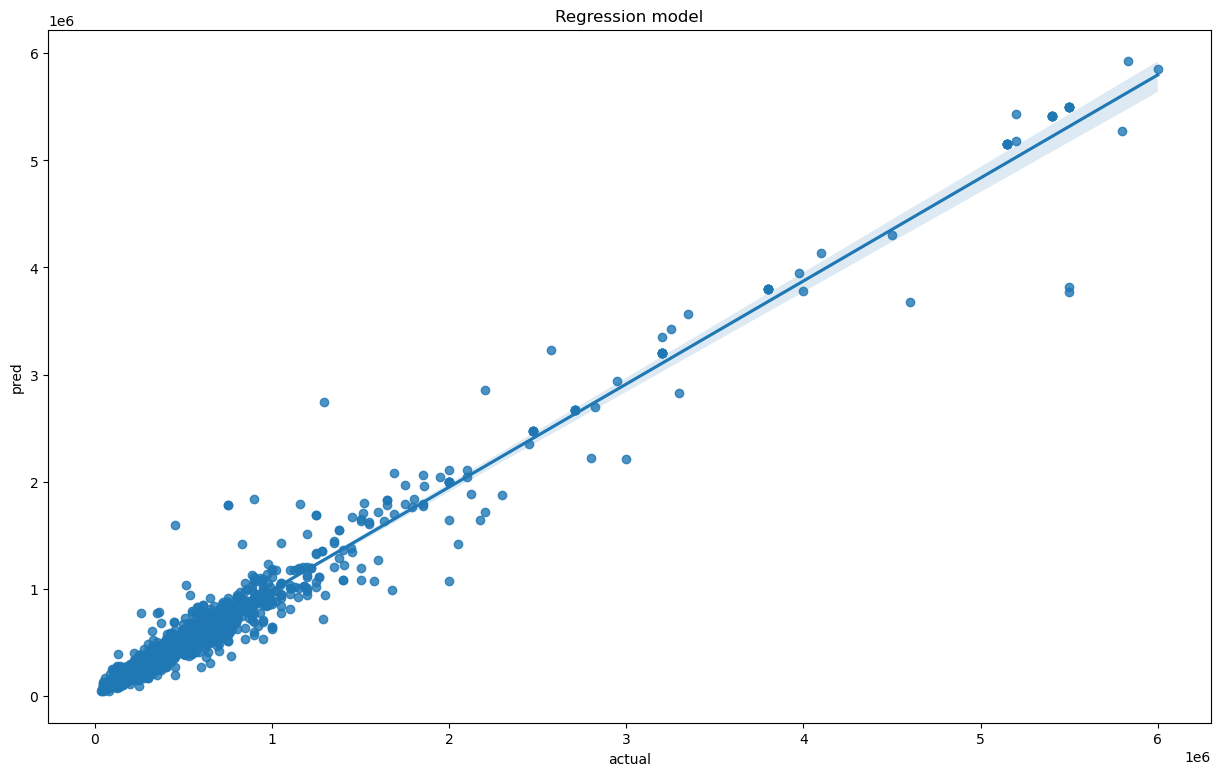

In [179]:
# dataframe으로 생성
comparison = pd.DataFrame({
    'actual' : y_test,# 실제값,'pred' # 예측값
    'pred' : test_pred 
}) #(가상의)
comparison
# 데이터프레임을 그래프로 표현
plt.figure(figsize=(15,9))
sns.regplot(x = 'actual', y = 'pred',data= comparison)
plt.title("Regression model")

In [173]:
# 실제값 vs 예측값 비교

# 훈련셋 mse
sum(train_rmse_total) / len(train_rmse_total)

66310.83285660684

In [174]:
# 시험셋 mse
sum(test_rmse_total) / len(test_rmse_total)

143552.1495621521